<a href="https://colab.research.google.com/github/jimmy92919/CNN-Assignment-2025/blob/main/ACS111143_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


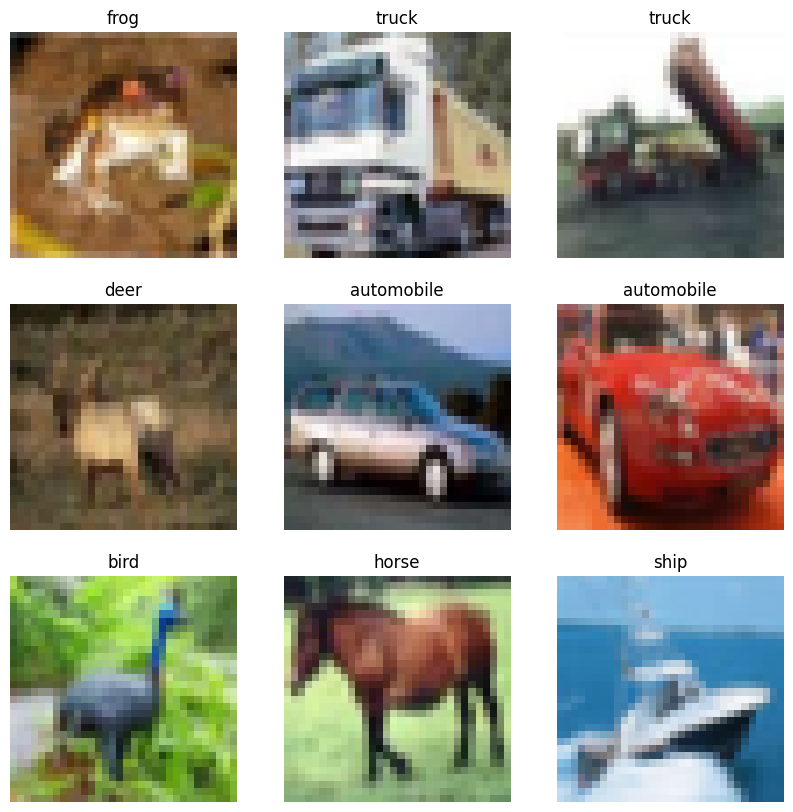

In [ ]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# Step 4: Build the CNN Model
model = models.Sequential([
    # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 2: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 3: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten the output for dense layers
    layers.Flatten(),
    # Dense Layer: 64 units
    layers.Dense(64, activation='relu'),
    # Output Layer: 10 units (one per class) with softmax
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3540 - loss: 1.7504 - val_accuracy: 0.5555 - val_loss: 1.2516
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.5780 - loss: 1.1863 - val_accuracy: 0.6193 - val_loss: 1.0967
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6436 - loss: 1.0134 - val_accuracy: 0.6555 - val_loss: 0.9953
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6830 - loss: 0.9069 - val_accuracy: 0.6646 - val_loss: 0.9619
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7063 - loss: 0.8303 - val_accuracy: 0.6857 - val_loss: 0.9022
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.7325 - loss: 0.7634 - val_accuracy: 0.6925 - val_loss: 0.8880
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7550 - loss: 0.6999 - val_accuracy: 0.7055 - val_loss: 0.8630
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7665 -

In [ ]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 4s - 14ms/step - accuracy: 0.7005 - loss: 0.8807

Test accuracy: 0.7005


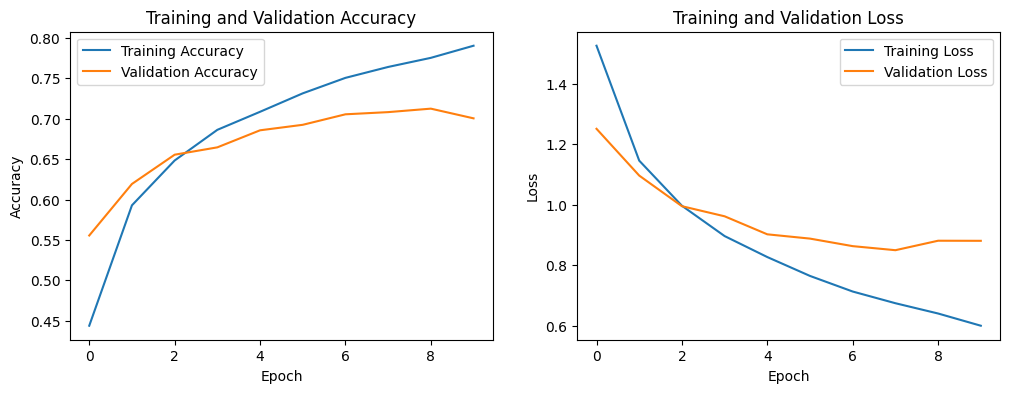

In [ ]:
# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: automobile, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: deer, True: frog


In [ ]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7005
Test Loss: 0.8807
Final Training Accuracy: 0.7904
Final Validation Accuracy: 0.7005
Final Training Loss: 0.5996
Final Validation Loss: 0.8807
Training Epochs: 10
Model Parameters: 122570


In [ ]:
!git clone https://github.com/jimmy92919/CNN-Assignment-2025.git

%cd CNN-Assignment-2025
import os
print("目前工作目錄：", os.getcwd())
print("該目錄檔案列表：", os.listdir())


In [30]:
test_code = """
import nbformat
import pytest
import glob
import re
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def load_notebook(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return nbformat.read(f, as_version=4)

def test_file_name():
    files = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')]
    assert len(files) == 1, "Exactly one notebook with format 'ClassNumber_CNN_Assignment.ipynb' required (excluding executed files)"
    assert re.match(r'[A-Z]{3}\\d{6}_CNN_Assignment\\.ipynb', files[0]), \\
        "Notebook name must follow 'ClassNumber_CNN_Assignment.ipynb' (e.g., ACS109145_CNN_Assignment.ipynb)"
    logger.info("Test file_name passed")

def test_task_1_model_changes():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    model_code = ""
    for cell in nb.cells:
        if cell.cell_type == 'code' and 'model = models.Sequential' in cell.source:
            model_code = cell.source
            break
    assert model_code, "Model definition not found"
    assert 'Conv2D' in model_code, "Task 1: Model must include at least one Conv2D layer"
    logger.info("Test task_1_model_changes passed")

def test_task_2_hyperparameters():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    compile_code = ""
    fit_code = ""
    for cell in nb.cells:
        if cell.cell_type == 'code':
            if 'model.compile' in cell.source:
                compile_code = cell.source
            if 'model.fit' in cell.source:
                fit_code = cell.source
    assert compile_code, "Model compilation not found"
    assert fit_code, "Model training not found"
    assert any(opt in compile_code for opt in ['SGD', 'RMSprop', 'Adam', 'adam']), \\
        "Task 2: Must specify an optimizer (e.g., SGD, RMSprop, Adam)"
    logger.info("Test task_2_hyperparameters passed")

def test_task_3_data_augmentation():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    augmentation_code = ""
    for cell in nb.cells:
        if cell.cell_type == 'code' and 'ImageDataGenerator' in cell.source:
            augmentation_code = cell.source
            break
    if not augmentation_code:
        print("Warning: Task 3: ImageDataGenerator not found, passing with reduced score")
        return
    assert any(param in augmentation_code for param in ['rotation_range', 'width_shift_range', 'height_shift_range', 'horizontal_flip']), \\
        "Task 3: ImageDataGenerator must include at least one augmentation parameter"
    logger.info("Test task_3_data_augmentation passed")

def test_task_4_visualization():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    vis_code = ""
    has_predictions = False
    for cell in nb.cells:
        if cell.cell_type == 'code' and ('plt.plot' in cell.source or 'plt.imshow' in cell.source or 'plt.subplot' in cell.source):
            vis_code = cell.source
        if cell.cell_type == 'code' and 'predictions' in cell.source:
            has_predictions = True
    assert vis_code, "Task 4: Visualization code not found"
    assert has_predictions, "Task 4: Must include predictions in code"
    logger.info("Test task_4_visualization passed")

def test_task_5_report():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    report_found = False
    for cell in nb.cells:
        if cell.cell_type == 'markdown' and any(title in cell.source for title in ['# Task 5:', '# Report', '# Conclusion']):
            report_found = True
            report_content = cell.source
            break
    if not report_found:
        print("Warning: Task 5: Report section not found, passing with reduced score")
        return
    assert len([line for line in report_content.split('\\n') if line.strip()]) > 3, "Task 5: Report section must contain meaningful content (more than 3 non-empty lines)"
    logger.info("Test task_5_report passed")
"""

with open("test_cnn.py", "w", encoding="utf-8") as f:
    f.write(test_code)
!pytest test_cnn.py

============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.3.5, pluggy-1.6.0
rootdir: /content/CNN-Assignment-2025/CNN-Assignment-2025
plugins: langsmith-0.3.44, typeguard-4.4.2, anyio-4.9.0
collected 6 items                                                              

test_cnn.py ......                                                       [100%]

============================== 6 passed in 0.13s ===============================
